<a href="https://colab.research.google.com/github/joshbrx/biomath_model/blob/main/Voronoi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Polígonos de Voronoi

In [14]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import random 
from scipy.spatial import Voronoi, voronoi_plot_2d
from matplotlib.collections import LineCollection

from matplotlib.patches import Polygon

mpl.rcParams['figure.figsize'] = (14,7)

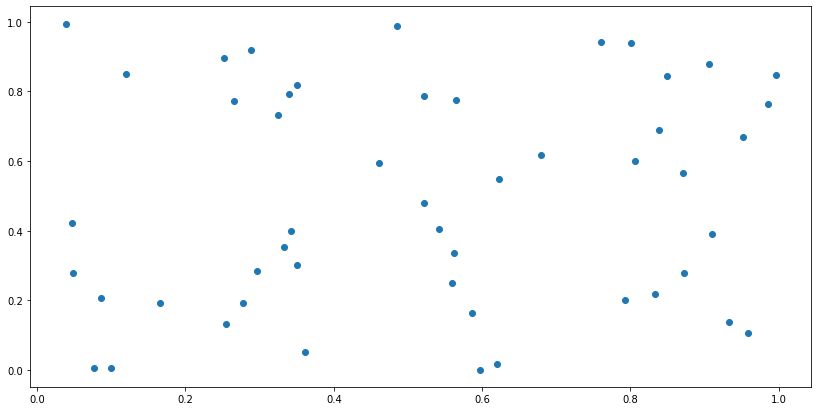

In [2]:
puntos = np.random.rand(50,2)        
# puntos
plt.scatter(puntos[:,0], puntos[:,1])

In [3]:
### Create Voronoi object
vor = Voronoi(puntos)
print(puntos.shape)

(50, 2)


In [4]:
### Get Voronoi vertices
vor_vertices = vor.vertices
print(vor_vertices.shape)

(90, 2)


In [5]:
### Get Voronoi regions
vor_regions = vor.regions
print(vor_regions)

[[24, 0, 1, 22], [33, 31, 30, 29, 32], [30, 17, 19, 18, 29], [32, -1, 13, 14, 18, 29], [33, 15, 5, 4, 3, -1, 32], [38, 35, 34, 36, 37], [36, 16, 31, 30, 17, 20, 34], [37, 16, 36], [38, 15, 33, 31, 16, 37], [41, 4, 5, 6, 39], [40, 21, 6, 39], [46, 21, 40, 43, 44], [49, 42, 43, 44], [46, 21, 6, 5, 15, 38, 35, 45], [48, 27, 28, 9, 10, 47], [53, 51, 50, 52], [53, 24, 22, 23, 51], [57, 55, 54, 56], [55, 28, 27, 25, 26, 54], [56, 23, 51, 50, 26, 54], [57, 7, 8, 9, 28, 55], [57, 7, 1, 22, 23, 56], [-1, 13, 12, 59], [62, 58, 60, 0, 1, 7, 8, 61], [68, 64, 63, 66, 65, 67], [68, 11, 2, 64], [66, 58, 60, -1, 59, 65], [67, 12, 59, 65], [68, 11, 14, 13, 12, 67], [71, 42, 43, 40, 39, 41, 70], [72, 69, 25, 27, 48, 49, 42, 71], [74, 45, 46, 44, 49, 48, 47, 73], [75, 10, 47, 73], [77, 70, 41, 4, 3, 76], [85, 79, 78, 81, 80, 82, 83, 84], [81, 75, 73, 74, 78], [79, 20, 34, 35, 45, 74, 78], [85, 19, 17, 20, 79], [82, 62, 61, 80], [81, 75, 10, 9, 8, 61, 80], [83, 63, 66, 58, 62, 82], [84, 2, 64, 63, 83], [8

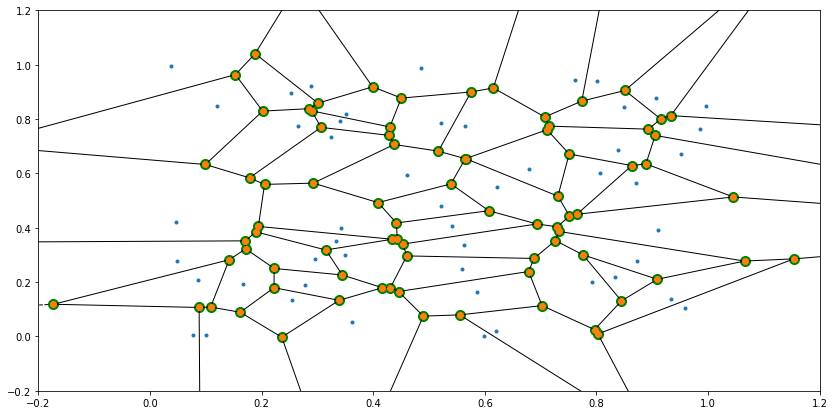

In [6]:
### Use built-in function to plot 
voronoi_plot_2d(vor)
plt.scatter(vor_vertices[:,0], vor_vertices[:,1], color="green", s=100)
plt.xlim([-0.2,1.2]); plt.ylim([-0.2,1.2])
plt.show()

Ahora continuamos al definir las fronteras de nuestra superficie. Como queremos que se asemeje a una estructura acinar, simulamos un medio círculo interior y exterior.

:\begin{align}
    \alpha(r, \theta) = r,\qquad\ \theta\in{\{0, \pi\}},\quad  r=\{1, 2\}
\end{align}

\begin{align}
    x &= r\cos\theta,\quad &y &= r\sin\theta\\
    \Rightarrow r &= \sqrt{x^2+y^2},\quad &\theta &= \arctan\left(\frac{y}{x}\right)
\end{align}

In [7]:
### parámetros
tol = 0.01
theta = np.linspace(tol, np.pi-tol, 1000);
r = np.array([1.0 + tol, 2.0 - tol]);

### funciones
alpha_x = lambda r, theta: r*np.cos(theta);
alpha_y = lambda r, theta: r*np.sin(theta);

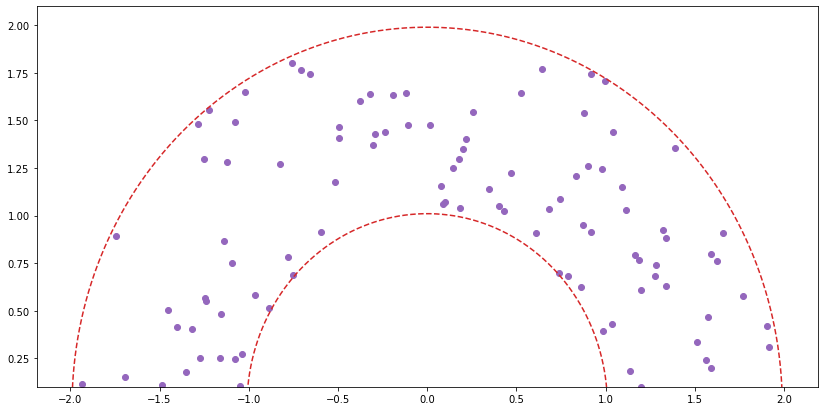

In [8]:
N = 100;

X, Y = [], []
for i in range(len(r)):
    X.append(alpha_x(r[i], theta))
    Y.append(alpha_y(r[i], theta))

X = np.array(X).flatten()
Y = np.array(Y).flatten()
pts = np.array([X, Y]).T

r_rand     = np.random.rand(N) * abs(r[-1]-r[0]) + r[0]
theta_rand = np.random.rand(N) * abs(theta[-1]-theta[0]) + theta[0]

X_rand = alpha_x(r_rand, theta_rand)
Y_rand = alpha_y(r_rand, theta_rand)
pts_rand = np.array([X_rand, Y_rand]).T

plt.scatter(X_rand, Y_rand, color="tab:purple")
plt.plot(X, Y, "--", color="tab:red"); plt.ylim([0.1,2.1])
plt.show()

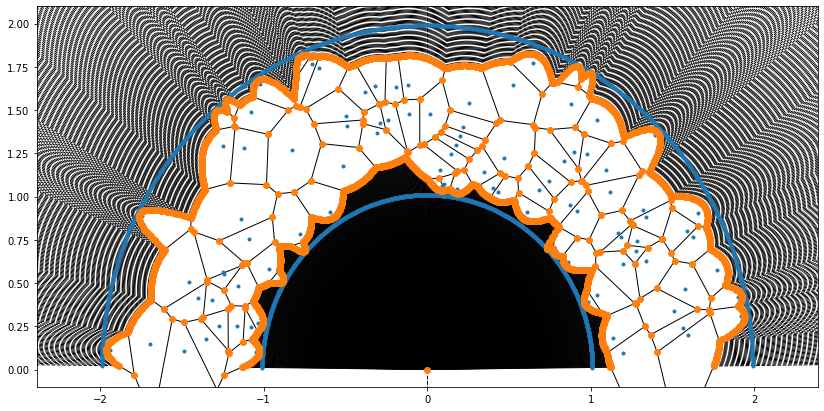

<Figure size 1080x504 with 0 Axes>

In [9]:
total = np.concatenate((pts, pts_rand))
vor = Voronoi(total)
vor_vertices = vor.vertices
vor_regions = vor.regions

voronoi_plot_2d(vor)
plt.ylim([-0.1,2.1])
plt.figure(figsize=(15,7))
plt.show()

(-0.1, 2.0)

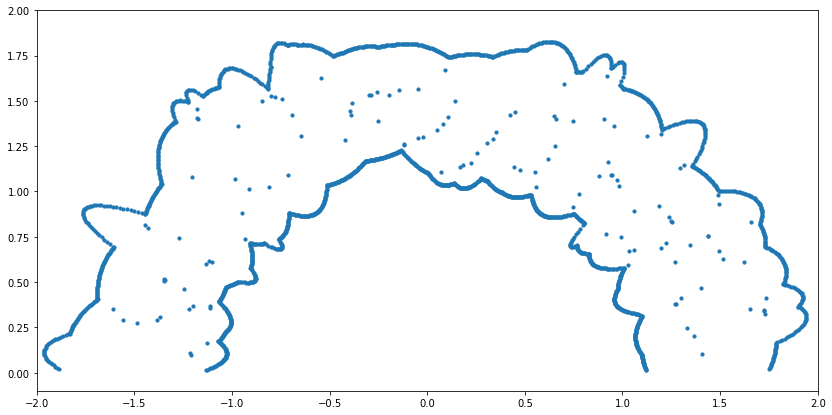

In [10]:
vor_vertices = vor_vertices[np.where(vor_vertices[:,1] >= 0)]
vor_vertices = vor_vertices[np.where(np.sqrt(vor_vertices[:,1]**2+vor_vertices[:,0]**2) >=r[0])]
vor_vertices = vor_vertices[np.where(np.sqrt(vor_vertices[:,1]**2+vor_vertices[:,0]**2) <=r[1])]
hull = ConvexHull(vor_vertices)
plt.scatter(vor_vertices[:,0], vor_vertices[:,1], s=10)
plt.xlim([-2,2]); plt.ylim([-0.1,2])

In [11]:
# vor_regions[0]
# vor_regions[0][-1]
vor_vertices[vor_regions[0]]

array([[-1.44538983,  0.81260853],
       [-1.60948647,  0.35068   ],
       [-1.55807051,  0.29271852],
       [ 0.90533037,  1.39937723],
       [-0.80008253,  1.52561996]])

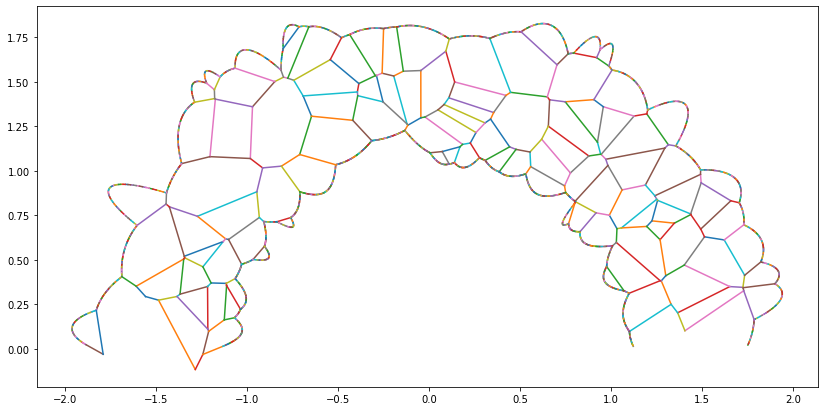

In [12]:
fig,ax = plt.subplots();

finite_segments = []
for pointidx, simplex in zip(vor.ridge_points, vor.ridge_vertices):
    simplex = np.asarray(simplex)
    if np.all(simplex >= 0):
        finite_segments.append(vor.vertices[simplex])

for i in range(len(finite_segments)): 
    x_line = finite_segments[i][:,0]
    y_line = finite_segments[i][:,1]
    r_line = (x_line**2 + y_line**2)**(1/2)
    if (np.min(r_line)>= tol) and (np.min(y_line) >= -0.15):
        plt.plot(x_line, y_line)

In [15]:
# polygon = []
# for i in range(len(vor_regions)):
#     if len(vor_regions[i]) >= 5:
#         if -1 not in vor_regions[i]:
#             finite_segments.append(np.array(vor_vertices[vor_regions[i] + [vor_regions[i][0]]]))

# fig,ax = plt.subplots();
# colors = ["k", "tab:red", "tab:green", "tab:purple", "tab:blue", "tab:orange"]
# for i in range(len(polygon)):
# for i in range(1):
    # p = Polygon(polygon[i], facecolor = colors[i])
    # ax.add_patch(p)
#     plt.scatter(polygon[i][:,0], polygon[i][:,1])
# plt.xlim([-2,2]); plt.ylim([-0.1,2])